### Imports and Setup

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate List of Cities

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['martinis',
 'punta arenas',
 'port elizabeth',
 'lolua',
 'cherskiy',
 'hamilton',
 'mataura',
 'novovarshavka',
 'tuatapere',
 'bolungarvik',
 'yellowknife',
 'hilo',
 'luangwa',
 'vila franca do campo',
 'atuona',
 'marawi',
 'mys shmidta',
 'hobart',
 'puerto ayora',
 'jaumave',
 'oktyabrskoye',
 'carnarvon',
 'avarua',
 'tuktoyaktuk',
 'bluff',
 'taolanaro',
 'vaini',
 'tyup',
 'airai',
 'saint george',
 'kerema',
 'gboko',
 'kahului',
 'tiksi',
 'lorengau',
 'albany',
 'vokhtoga',
 'torbay',
 'belomorsk',
 'qaanaaq',
 'faanui',
 'el tocuyo',
 'attawapiskat',
 'maningrida',
 'kapaa',
 'busselton',
 'ushuaia',
 'hermanus',
 'bilibino',
 'kindersley',
 'coquimbo',
 'saryshagan',
 'coruripe',
 'cap malheureux',
 'hasaki',
 'merauke',
 'rikitea',
 'barrow',
 'yomitan',
 'saint-philippe',
 'khatanga',
 'along',
 'shangrao',
 'luderitz',
 'buala',
 'mundo nuevo',
 'hithadhoo',
 'castro',
 'touros',
 'souillac',
 'ostrovnoy',
 'bethel',
 'andenes',
 'wausau',
 'lebu',
 'arraial do cabo'

### Get Weather Data for Each City

In [3]:
# First, set up a URL for queries, making sure to set units to metric so we get temperature in °C rather than Kelvin.
base_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# Set up a list to hold what we want from the responses
weather_list = []

# Now, loop through the city list, and use enumerate to give us an index to track progress.
for num, city in enumerate(cities, start = 1):
    # Build a target url for each query
    target_url = base_url + city
    # We'll use try-except to catch any errors.
    try:
        # print a message to show that we're starting an attempt
        print(f"Processing target # {num} of {len(cities)}: {city}.")
        # send the request, and get a response.
        response = requests.get(target_url).json()
        
        # if the response comes back as 404 (not found), then move along
        if response['cod'] == '404':
            print(f"--- Target #{num}, {city}, unsuccessful. ---")
        
        # otherwise, extract the needed information and add it to our list.
        else:
            town = response['name']
            lat = response['coord']['lat']
            lng = response['coord']['lon']
            max_temp = response['main']['temp_max']
            humidity = response['main']['humidity']
            cloudiness = response['clouds']['all']
            wind_speed = response['wind']['speed']
            country = response['sys']['country']
            date = response['dt']
            weather_list.append([town,
                              lat,
                              lng,
                              max_temp,
                              humidity,
                              cloudiness,
                              wind_speed,
                              country,
                              date])
    # if something goes really wrong, we wind up here.
    except:
        print(f"--- Target {num}, {city}, failed. ---")

# Print a final count so we know how we did.
print(f"Found {len(weather_list)} of {len(cities)} targets.")

Processing target # 1 of 628: martinis.
Processing target # 2 of 628: punta arenas.
Processing target # 3 of 628: port elizabeth.
Processing target # 4 of 628: lolua.
--- Target #4, lolua, unsuccessful. ---
Processing target # 5 of 628: cherskiy.
Processing target # 6 of 628: hamilton.
Processing target # 7 of 628: mataura.
Processing target # 8 of 628: novovarshavka.
Processing target # 9 of 628: tuatapere.
Processing target # 10 of 628: bolungarvik.
--- Target #10, bolungarvik, unsuccessful. ---
Processing target # 11 of 628: yellowknife.
Processing target # 12 of 628: hilo.
Processing target # 13 of 628: luangwa.
Processing target # 14 of 628: vila franca do campo.
Processing target # 15 of 628: atuona.
Processing target # 16 of 628: marawi.
Processing target # 17 of 628: mys shmidta.
--- Target #17, mys shmidta, unsuccessful. ---
Processing target # 18 of 628: hobart.
Processing target # 19 of 628: puerto ayora.
Processing target # 20 of 628: jaumave.
Processing target # 21 of 628:

Processing target # 175 of 628: mokhsogollokh.
Processing target # 176 of 628: port alfred.
Processing target # 177 of 628: amderma.
--- Target #177, amderma, unsuccessful. ---
Processing target # 178 of 628: vanavara.
Processing target # 179 of 628: mahebourg.
Processing target # 180 of 628: cape town.
Processing target # 181 of 628: waddan.
Processing target # 182 of 628: alofi.
Processing target # 183 of 628: meulaboh.
Processing target # 184 of 628: buchanan.
Processing target # 185 of 628: sistranda.
Processing target # 186 of 628: kaitangata.
Processing target # 187 of 628: beyneu.
Processing target # 188 of 628: rawson.
Processing target # 189 of 628: solwezi.
Processing target # 190 of 628: louisbourg.
--- Target #190, louisbourg, unsuccessful. ---
Processing target # 191 of 628: atambua.
Processing target # 192 of 628: dunedin.
Processing target # 193 of 628: fare.
Processing target # 194 of 628: chuy.
Processing target # 195 of 628: quatre cocos.
Processing target # 196 of 62

Processing target # 352 of 628: inhambane.
Processing target # 353 of 628: port keats.
Processing target # 354 of 628: beringovskiy.
Processing target # 355 of 628: port blair.
Processing target # 356 of 628: leningradskiy.
Processing target # 357 of 628: mogadishu.
Processing target # 358 of 628: araguaina.
Processing target # 359 of 628: scarborough.
Processing target # 360 of 628: zavitinsk.
Processing target # 361 of 628: menongue.
Processing target # 362 of 628: guerrero negro.
Processing target # 363 of 628: iwanai.
Processing target # 364 of 628: dapaong.
Processing target # 365 of 628: kimbe.
Processing target # 366 of 628: scottsburgh.
--- Target #366, scottsburgh, unsuccessful. ---
Processing target # 367 of 628: arman.
Processing target # 368 of 628: port hedland.
Processing target # 369 of 628: baykit.
Processing target # 370 of 628: paciran.
Processing target # 371 of 628: kalabugao.
--- Target #371, kalabugao, unsuccessful. ---
Processing target # 372 of 628: matagami.
Pr

Processing target # 536 of 628: belaya gora.
Processing target # 537 of 628: salinas.
Processing target # 538 of 628: san lawrenz.
Processing target # 539 of 628: impfondo.
Processing target # 540 of 628: rosetta.
Processing target # 541 of 628: tautira.
Processing target # 542 of 628: aquiraz.
Processing target # 543 of 628: cayenne.
Processing target # 544 of 628: tura.
Processing target # 545 of 628: lalupon.
Processing target # 546 of 628: ankang.
Processing target # 547 of 628: viransehir.
Processing target # 548 of 628: arrifes.
Processing target # 549 of 628: svetlaya.
Processing target # 550 of 628: hanna.
Processing target # 551 of 628: gulfport.
Processing target # 552 of 628: byron bay.
Processing target # 553 of 628: paita.
Processing target # 554 of 628: boundiali.
Processing target # 555 of 628: moultonborough.
Processing target # 556 of 628: coahuayana.
Processing target # 557 of 628: chitipa.
Processing target # 558 of 628: zolotinka.
--- Target #558, zolotinka, unsucce

### Convert Raw Data to a DataFrame and Save as .csv

In [4]:
# set up a data frame with the column headings we want.
# (making a point of matching the order we used in the for loop earlier)
weather_df=pd.DataFrame(weather_list,columns=['City',
                                   'Lat',
                                   'Lng',
                                   'Max Temp',
                                   'Humidity',
                                   'Cloudiness',
                                   'Wind Speed',
                                   'Country',
                                   'Date'])

In [5]:
# Show the dataframe.
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mărtiniş,46.23,25.38,16.11,93,54,0.83,RO,1592095197
1,Punta Arenas,-53.15,-70.92,-4.00,85,26,1.50,CL,1592095085
2,Port Elizabeth,-33.92,25.57,9.00,87,100,2.10,ZA,1592095092
3,Cherskiy,68.75,161.30,20.06,40,0,5.45,RU,1592095087
4,Hamilton,39.18,-84.53,22.00,56,75,3.60,US,1592094829
...,...,...,...,...,...,...,...,...,...
571,Saldanha,-33.01,17.94,11.70,52,0,2.61,ZA,1592095100
572,Suntar,62.14,117.63,15.21,59,6,3.30,RU,1592095245
573,Praia,14.92,-23.51,26.00,83,40,4.10,CV,1592095245
574,Jaguarari,-10.26,-40.20,19.35,94,84,4.05,BR,1592095245


### Inspect the data and remove the cities where the humidity > 100%.

In [6]:
# This wasn't in the readme, but I'm no fan of ultra high humidity either.
# First, let's see if there are any cities with 100% humidity.
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,19.596667,24.326753,19.356858,69.760417,48.420139,3.652986,1.592095e+09
std,33.769881,91.542649,7.780801,21.448946,40.202754,2.441147,9.442441e+01
min,-54.800000,-179.170000,-4.000000,3.000000,0.000000,0.120000,1.592095e+09
25%,-8.950000,-56.502500,13.000000,56.000000,1.000000,1.787500,1.592095e+09
50%,23.260000,30.335000,20.095000,75.000000,40.000000,3.100000,1.592095e+09
75%,48.102500,106.460000,25.560000,87.000000,90.000000,5.100000,1.592095e+09
max,78.220000,179.320000,37.170000,100.000000,100.000000,13.400000,1.592095e+09


In [7]:
# We do have at least some cities with 100% humidity.
# out of curiosity, let's see them.
dripping_df = weather_df.loc[weather_df['Humidity'] == 100, :]
dripping_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
48,Hasaki,35.73,140.83,23.89,100,75,2.10,JP,1592095091
61,Touros,-5.20,-35.46,24.00,100,13,1.50,BR,1592095110
100,Kaseda-shirakame,31.42,130.32,27.00,100,75,5.10,JP,1592095208
112,Watsa,3.04,29.54,16.94,100,58,1.37,CD,1592095209
114,Malbork,54.04,19.03,14.44,100,0,4.62,PL,1592095114
152,Klaksvík,62.23,-6.59,9.00,100,38,2.60,FO,1592095107
153,Nicoya,10.15,-85.45,25.00,100,75,3.60,CR,1592095213
210,Vestmanna,62.16,-7.17,9.00,100,75,2.60,FO,1592095217
236,Guarujá,-23.99,-46.26,25.56,100,4,0.45,BR,1592095061
281,Ranong,9.97,98.63,25.00,100,40,4.12,TH,1592095204


In [8]:
# Now let's collect all the not-quite-drenched cities in a dataframe,
# and save them as a .csv
cities_df = weather_df.copy().loc[weather_df['Humidity'] != 100, :]
cities_df.to_csv(output_data_file, index = False)

### Plotting the Data

In [9]:
# We need the date, and all of the dates are in unix timestamp, and within each other by seconds,
# Taking the average will basically give us the calendar date.
date = datetime.utcfromtimestamp(cities_df['Date'].mean()).strftime('%Y-%m-%d')
print(date)

2020-06-14


In [10]:
# We'll be doing a bunch of plots, so let's make this a little easier
# by defining a function.
def quick_plot(x_values, y_values, x_label, y_label, title):
    plt.scatter(x_values,y_values,  edgecolors='b')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{title} ({date})")
    # I chose the name the output plots using the title.
    file_name = f"../output_data/{title}.png"
    plt.savefig(file_name)
    plt.show()

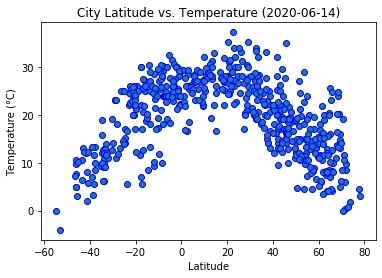

In [11]:
# First, let's plot latitude vs temperature:
quick_plot(cities_df['Lat'],
               cities_df['Max Temp'],
              'Latitude',
              'Temperature (°C)',
              'City Latitude vs. Temperature')

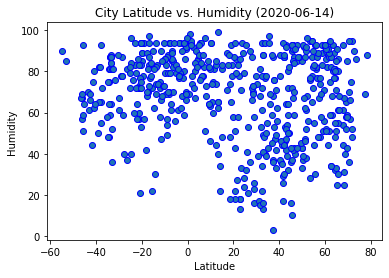

In [12]:
# now latitude vs humidity:
quick_plot(cities_df['Lat'],
               cities_df['Humidity'],
              'Latitude',
              'Humidity',
              'City Latitude vs. Humidity')

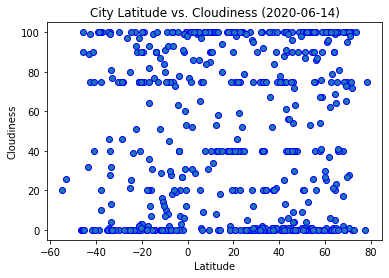

In [13]:
# now latitude vs cloudiness
quick_plot(cities_df['Lat'],
               cities_df['Cloudiness'],
              'Latitude',
              'Cloudiness',
              'City Latitude vs. Cloudiness')

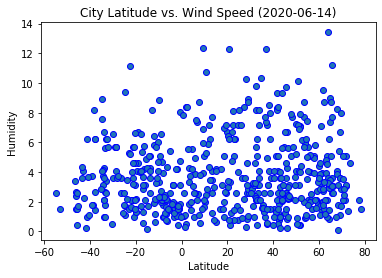

In [14]:
# finally latitude vs wind speed
quick_plot(cities_df['Lat'],
               cities_df['Wind Speed'],
              'Latitude',
              'Humidity',
              'City Latitude vs. Wind Speed')

### Linear Regressions

In [15]:
# Here, we define a function for plotting with the best fit line.
# It's basically the same as quick_plot, just with the linear regression line and equation added.
# The trickiest part of this turns out to be positioning the best fit
# equation, so I specify those coordinates manually.

def reg_plot(x_values, y_values, x_label, y_label, title, text_x, text_y):
    # this is all the same as quick_plot
    plt.scatter(x_values,y_values,  edgecolors='b')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{title} ({date})")
    # here's where we get the regression and generate a line equation
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(text_x,text_y),fontsize=15,color="red")
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")
    # I chose the name the output plots using the title.
    file_name = f"../output_data/{title}.png"
    plt.savefig(file_name)
    plt.show()

In [16]:
# Now, we need to split the data into northern and southern hemisphere
# In the unlikely event we have a latitude of "0", we're going to consider that as
# being in the norhthern hemisphere
cities_north_df = cities_df.copy().loc[cities_df['Lat'] >= 0, :]
cities_south_df = cities_df.copy().loc[cities_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5331828491971963


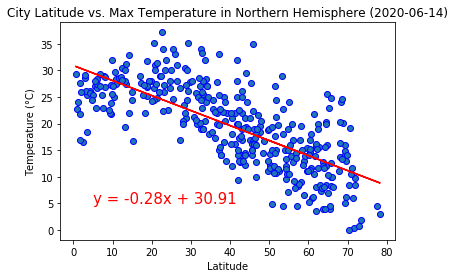

In [17]:
reg_plot(cities_north_df['Lat'],
               cities_north_df['Max Temp'],
              'Latitude',
              'Temperature (°C)',
              'City Latitude vs. Max Temperature in Northern Hemisphere',
                5,
                5)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5950764697017521


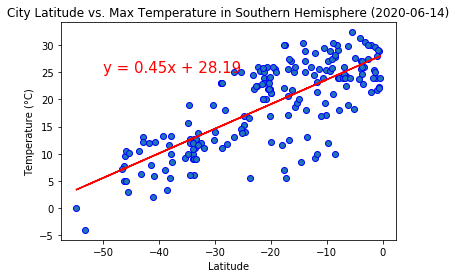

In [18]:
reg_plot(cities_south_df['Lat'],
               cities_south_df['Max Temp'],
              'Latitude',
              'Temperature (°C)',
              'City Latitude vs. Max Temperature in Southern Hemisphere',
                -50,
                25)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001573616156528607


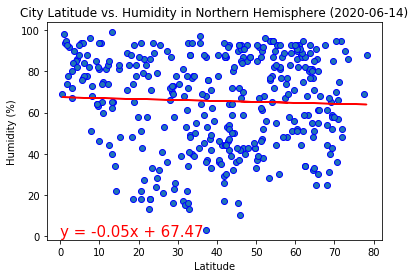

In [19]:
reg_plot(cities_north_df['Lat'],
               cities_north_df['Humidity'],
              'Latitude',
              'Humidity (%)',
              'City Latitude vs. Humidity in Northern Hemisphere',
                0,
                0)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04415916954529007


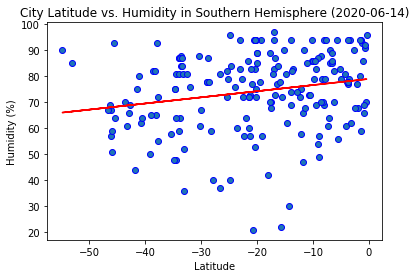

In [20]:
reg_plot(cities_south_df['Lat'],
               cities_south_df['Humidity'],
              'Latitude',
              'Humidity (%)',
              'City Latitude vs. Humidity in Southern Hemisphere',
                -55,
                15)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0038302856808145034


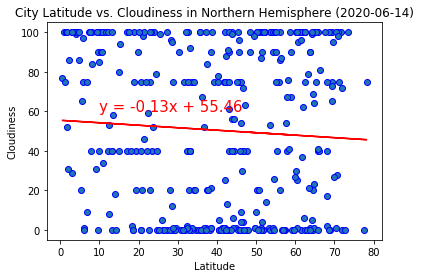

In [21]:
reg_plot(cities_north_df['Lat'],
               cities_north_df['Cloudiness'],
              'Latitude',
              'Cloudiness',
              'City Latitude vs. Cloudiness in Northern Hemisphere',
                10,
                60)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0036657781632297424


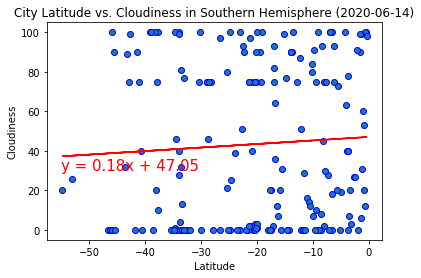

In [22]:
reg_plot(cities_south_df['Lat'],
               cities_south_df['Cloudiness'],
              'Latitude',
              'Cloudiness',
              'City Latitude vs. Cloudiness in Southern Hemisphere',
                -55,
                30)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0008732166198866759


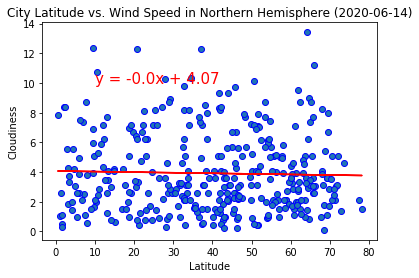

In [23]:
reg_plot(cities_north_df['Lat'],
               cities_north_df['Wind Speed'],
              'Latitude',
              'Cloudiness',
              'City Latitude vs. Wind Speed in Northern Hemisphere',
                10,
                10)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012950476382972956


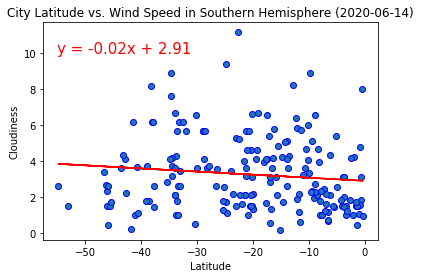

In [24]:
reg_plot(cities_south_df['Lat'],
               cities_south_df['Wind Speed'],
              'Latitude',
              'Cloudiness',
              'City Latitude vs. Wind Speed in Southern Hemisphere',
                -55,
                10)

### Observations
#### Observation 1: Temperature and Latitude (Norhtern Hemisphere)
There is a strong negative correlation between maximum temperature and latitude in the Northern Hemisphere. This comes as no surprise: The angle of solar incidence is directly related to latitude, which is essentially a measure of geographic distance from the equator. In other words, the farther you get from the equator, the more intense the sun's rays. It is therefore reasonable to see that temperatures are highest near the equator, and fall off as you move north in the Northern Hemisphere.
#### Observation 2: Temperature and Latitude (Southern Hemisphere)
Similarly, there is a strong positive correlation between maximum temperature and latitude in the Southern Hemishpere. The sign convention for latitude is negative in the Southern Hemisphere, so the correlation is positive in this case.
#### Observation 3: Peak Temperature is in the Northern Hemisphere
The scatterplot for maximum temperature shows a broad peak in the Northern Hemisphere at roughly 15-20°N. This is unsurprising given that we are nearly at the June solstice, and so we should expect a heavy tilt in temperature toward the Norther Hemisphere as it is in its summer season.